<a href="https://colab.research.google.com/github/stephenchen0814/04-LinearReg_Salary/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import torch
import torch.nn as nn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [7]:
data = pd.read_csv('Ionosphere.csv')
data.head()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute26,Attribute27,Attribute28,Attribute29,Attribute30,Attribute31,Attribute32,Attribute33,Attribute34,Target
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,1
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,0
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1


In [10]:
data = {'Attribute3','Attribute5', 'Attribute8'}
df = pd.DataFrame(data)
print(df)

            0
0  Attribute5
1  Attribute3
2  Attribute8


In [34]:
X = data_df[["Attribute3","Attribute5"]]
y = data_df[["Attribute8"]]
y = data_df[['Target']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [31]:
data_df = pd.read_csv('Ionosphere.csv')

In [35]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [36]:
y_pred = model.predict(X_test)

In [42]:
print(confusion_matrix(y_test, y_pred))

[[ 6 18]
 [14 33]]


In [43]:
print(model.score(X_test, y_test))

0.6901408450704225


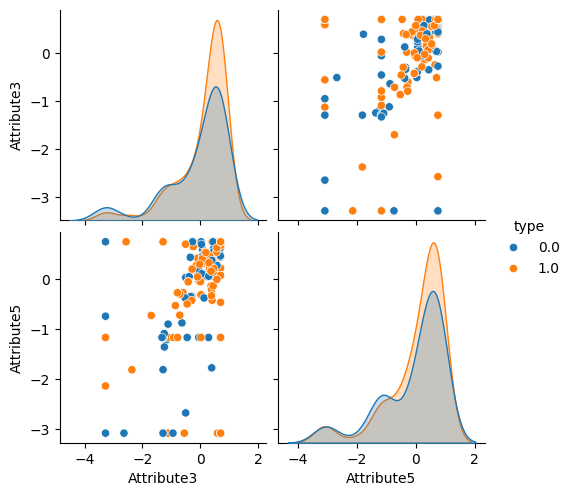

In [52]:
df = pd.DataFrame(data=X_train, columns=X.columns)
df=df.iloc[:,:7]
df['type'] = y_train

sns.pairplot(df, hue="type")
plt.show()

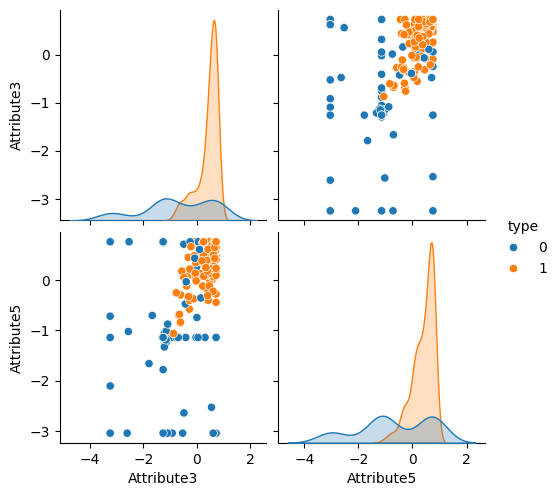

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

df = pd.DataFrame(data=X_train, columns=X.columns)
df=df.iloc[:,:7]
df['type'] = pd.DataFrame(data=y_train).reset_index(drop=True)

sns.pairplot(df, hue="type")
plt.show()

In [58]:
X2_train=X_train[:,[0,1]]
y2_train=y_train
X2_test=X_test[:,[0,1]]
y2_test=y_test

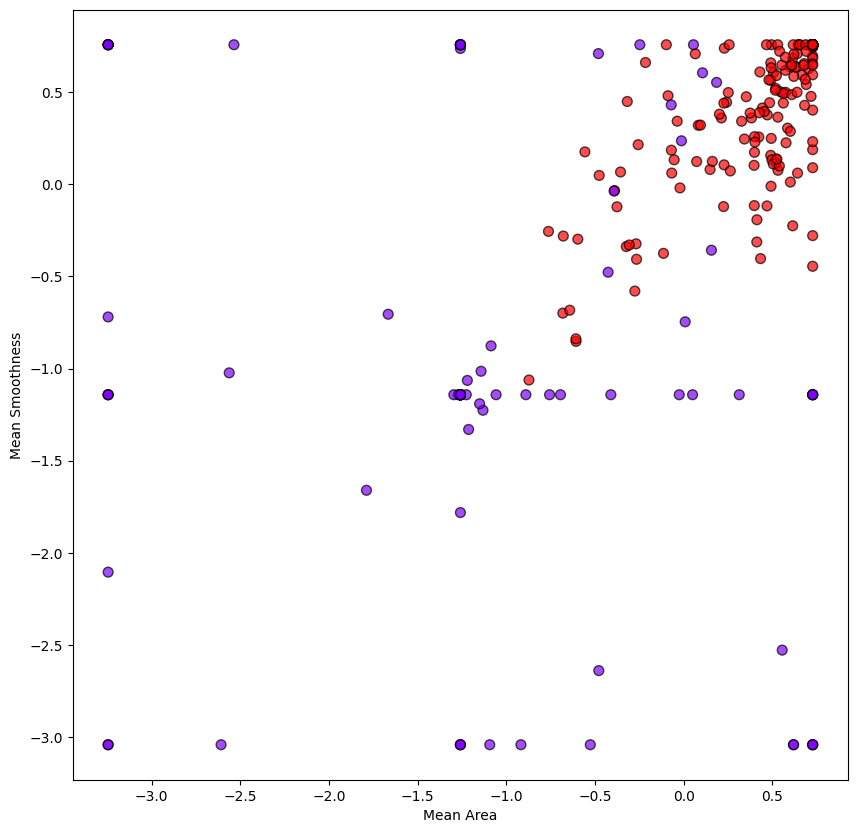

In [60]:
plt.figure(figsize=(10,10))
plt.scatter(X2_train[:,0],X2_train[:,1] ,c=y2_train.values.flatten(), cmap='rainbow', edgecolors='k', s=50, alpha=0.7)
plt.xlabel('Mean Area')
plt.ylabel('Mean Smoothness')
plt.show()

In [63]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

class LogRegSimple():
    def __init__(self, lr=0.1, n_epoch=100):
        self.lr=lr
        self.n_epoch=n_epoch
        self.weights=None
        self.bias=None

    def __forward__(self, X):
        return sigmoid(np.dot(X, self.weights)+self.bias)

    def fit(self, X, y):
        self.weights=np.array([0,0])
        self.bias=0

        y = y.values.flatten() # Convert y to a 1D numpy array

        for epoch in range(self.n_epoch):
            y_pred=self.__forward__(X)
            loss=(np.dot(-y, np.log(y_pred))-np.dot(1-y, np.log(1-y_pred)))/X.shape[0]

            self.weights=self.weights+self.lr*np.dot(X.T, y-y_pred)/X.shape[0]
            self.bias+=self.lr*(y-y_pred).mean()

        return self

    def predict(self, X):
        return self.__forward__(X).round()
    def param(self):
        return self.weights, self.bias

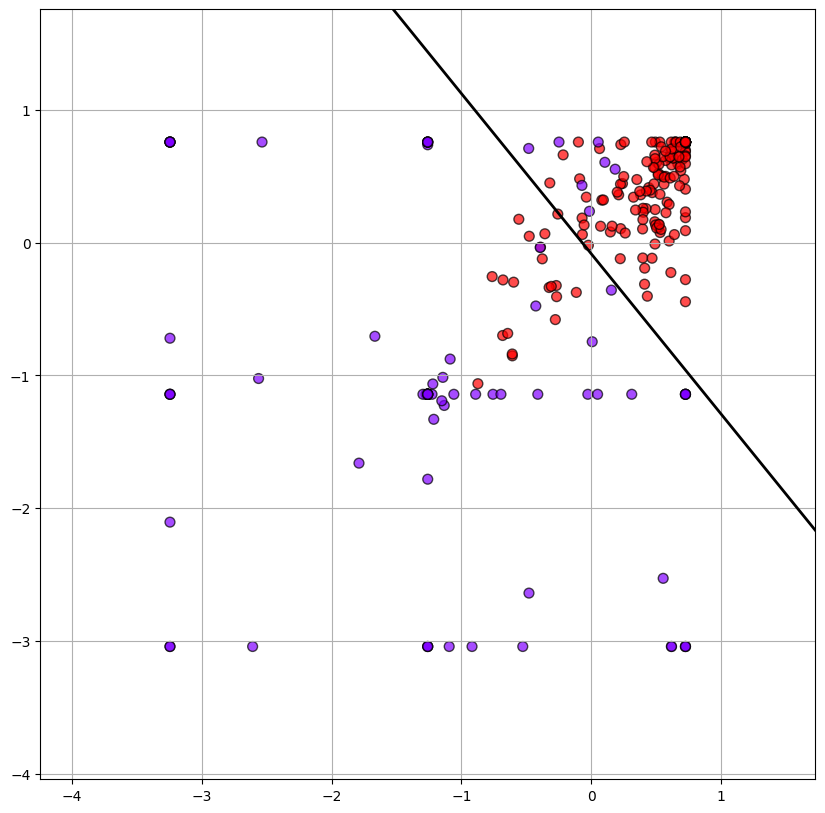

In [65]:
model=LogRegSimple(lr=0.1,n_epoch=200)
model.fit(X2_train, y2_train)


xv=np.arange(-2,5, 0.1)
w,b=model.weights, model.bias
yv=(-xv*w[0]-b+0.5)/w[1]

plt.figure(figsize=(10,10))
plt.scatter(X2_train[:,0],X2_train[:,1] ,c=y2_train.values.flatten(), cmap='rainbow', edgecolors='k', s=50, alpha=0.7)
plt.plot(xv, yv, linewidth=2, c='k')
plt.xlim([X2_train[:,0].min()-1, X2_train[:,0].max()+1])
plt.ylim([X2_train[:,1].min()-1, X2_train[:,1].max()+1])
plt.grid()
plt.show()

In [68]:
def plot_decision_boundary(X, y, model, resolution=0.02):
    colors = ['red', 'blue', 'lightgreen', 'gray', 'cyan']
    cmap = ListedColormap(colors[:len(np.unique(y))])
    markers = ('s', 'x', 'o', '^', 'v')

    # Set min and max values and give it some padding
    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1

    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution), np.arange(y_min, y_max, resolution))
    # Predict the function value for the whole grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    y = y.values.flatten() # Convert y to a 1D numpy array

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(X[y==cl, 0], X[y==cl, 1],  color=cmap(idx),edgecolors='k',marker=markers[idx],label=cl)

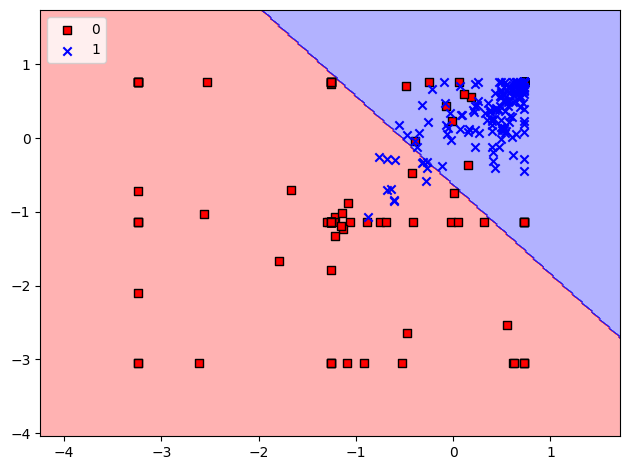

In [69]:
plot_decision_boundary(X2_train, y2_train, model)
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

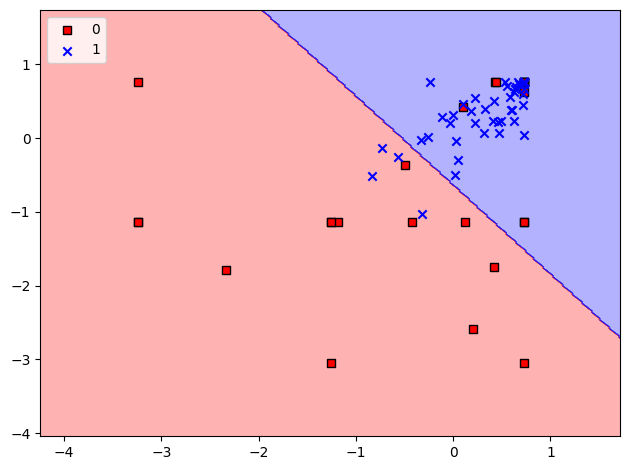

In [70]:
plot_decision_boundary(X2_test, y2_test, model)
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [71]:
y_test_pred=model.predict(X2_test)
confusion_matrix(y2_test,y_test_pred)

array([[14, 10],
       [ 4, 43]])

In [72]:
SKLLogReg = LogisticRegression()
SKLLogReg.fit(X2_train, y2_train)
predictions =SKLLogReg.predict(X2_test)
confusion_matrix(y2_test, predictions)

array([[14, 10],
       [ 4, 43]])

In [73]:
SKLLogReg2 = SGDClassifier(loss='log_loss', max_iter=200, learning_rate='constant', eta0=0.1)
SKLLogReg2.fit(X2_train, y2_train)
predictions =SKLLogReg2.predict(X2_test)
confusion_matrix(y2_test, predictions)

array([[14, 10],
       [ 4, 43]])

In [77]:
X_train=torch.tensor(X_train, dtype=torch.float)
y_train=torch.tensor(y_train.values, dtype=torch.float)
X_test=torch.tensor(X_test, dtype=torch.float)
y_test=torch.tensor(y_test.values, dtype=torch.float)

n_samples, n_features = X_train.shape
y_train=y_train.reshape(-1, 1)
y_test=y_test.reshape(-1,1)

In [78]:
class PTLogisticRegression(nn.Module):
    def __init__(self, n_features):
        super(PTLogisticRegression, self).__init__()
        self.linear= nn.Linear(n_features, 1)
    def forward(self,x):
        y_pred=torch.sigmoid(self.linear(x))
        return y_pred

In [104]:
lr=0.1
n_epoch=100

In [105]:
model=PTLogisticRegression(n_features)

lossfunc=nn.BCELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=lr, weight_decay=0)

In [106]:
train_loss=[]
test_loss=[]


for epoch in range(n_epoch):
    model.train()
    y_pred=model(X_train)
    loss=lossfunc(y_pred, y_train)
    loss.backward()
    train_loss.append(loss.item())
    optimizer.step()
    optimizer.zero_grad()



    model.eval()
    with torch.inference_mode():
        y_test_pred=model(X_test)
        lost_test=lossfunc(y_test_pred, y_test)
        test_loss.append(lost_test)

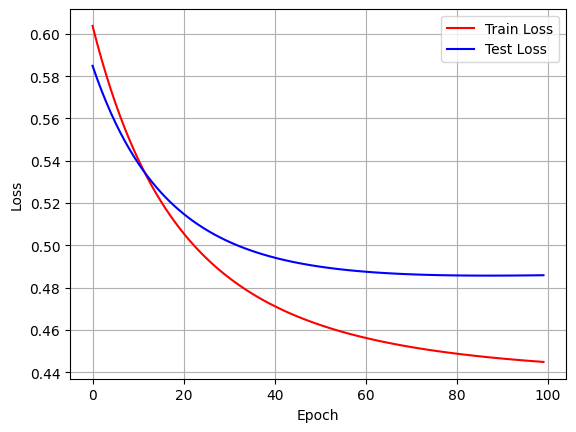

In [107]:
fig=plt.figure()
xv=np.arange(0, n_epoch)
plt.plot(xv, train_loss, 'r', label="Train Loss")
plt.plot(xv, test_loss, 'b', label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

In [108]:
y_test_pred=y_test_pred.round()
confusion_matrix(y_test,y_test_pred)

array([[14, 10],
       [ 4, 43]])

In [109]:
def weight_reset(m):
    if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
        m.reset_parameters()

model.apply(weight_reset)

PTLogisticRegression(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)